In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_csv(r"C:\Users\Rohit\Desktop\Rohit 2\project\amazon.csv")
data

,screen_name,created_at,text,in_reply_to_screen_name,retweeted_status_screen_name,user_description,source,lang,id
0,amazonIN,2021-07-04T12:27:12Z,Extend your support to lakhs of local business...,NaN,NaN,The official Twitter feed of https://t.co/xHtu...,Twitter Web App,en,1411662880655613958
1,amazonIN,2021-07-04T10:13:46Z,#AmazonSmallBusinessDays special!\n\nIrresisti...,NaN,NaN,The official Twitter feed of https://t.co/xHtu...,Twitter Web App,en,1411629298415374336
2,amazonIN,2021-07-04T06:43:14Z,Our #SellersOfAmazon are greatful to all the c...,NaN,NaN,The official Twitter feed of https://t.co/xHtu...,Twitter Web App,en,1411576318513221638
3,amazonIN,2021-07-04T06:39:08Z,Celebrate small businesses these #AmazonSmallB...,NaN,NaN,The official Twitter feed of https://t.co/xHtu...,Twitter Web App,en,1411575285955190795
4,amazonIN,2021-07-04T04:17:07Z,@Ckchandra143 We are sorry to know about your ...,Ckchandra143,NaN,The official Twitter feed of https://t.co/xHtu...,Sprinklr,en,1411539546593009666
...,...,...,...,...,...,...,...,...,...
3195,amazonIN,2018-10-30T13:04:42Z,This time the celebration is going to be bigge...,NaN,NaN,The official Twitter feed of https://t.co/xHtu...,Twitter Web Client,en,1057256985874165762
3196,amazonIN,2018-10-30T09:31:14Z,"This Diwali, gift your loved ones what they re...",NaN,NaN,The official Twitter feed of https://t.co/xHtu...,Twitter Media Studio,en,1057203263144148992
3197,amazonIN,2018-10-30T09:14:11Z,RT @AmazonMusicIN: 500 lucky @AmazonMusicIN li...,NaN,AmazonMusicIN,The official Twitter feed of https://t.co/xHtu...,Twitter Web Client,en,1057198973474168832
3198,amazonIN,2018-10-30T07:53:01Z,RT @PrimeVideoIN: Stream Gold on Amazon Prime ...,NaN,PrimeVideoIN,The official Twitter feed of https://t.co/xHtu...,Twitter Web Client,en,1057178547230392320


In [3]:
data.isnull().sum()

screen_name                        0
created_at                         0
text                               0
in_reply_to_screen_name         1897
retweeted_status_screen_name    3019
user_description                   0
source                             0
lang                               7
id                                 0
dtype: int64

In [4]:
data_1=data.copy()
data_1=data_1.drop(columns=["in_reply_to_screen_name","retweeted_status_screen_name"])

In [5]:
data_1["lang"].fillna("en",inplace=True)

In [6]:
data_1.isnull().sum()

screen_name         0
created_at          0
text                0
user_description    0
source              0
lang                0
id                  0
dtype: int64

In [7]:
data_1=pd.DataFrame(data_1.text)
data_1.head()

,text
0,Extend your support to lakhs of local business...
1,#AmazonSmallBusinessDays special!\n\nIrresisti...
2,Our #SellersOfAmazon are greatful to all the c...
3,Celebrate small businesses these #AmazonSmallB...
4,@Ckchandra143 We are sorry to know about your ...


In [8]:
data_1.iloc[525,0]

"@MANOJKU89219100 In case you've already replied, please wait and we'll reach out to you soon.^GD"

In [9]:
data_1.text=data_1.text.str.lower()

In [10]:
data_1.iloc[525,0]

"@manojku89219100 in case you've already replied, please wait and we'll reach out to you soon.^gd"

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [13]:
data_1['text']=data_1['text'].apply(lambda x : remove_punctuation(x))

In [14]:
data_1.iloc[525,0]

'manojku89219100 in case youve already replied please wait and well reach out to you soongd'

In [15]:
data_1['text'] = data_1['text'].str.replace(r'http\S+|www.\S+','',case=False)
data_1.iloc[525,0]

'manojku89219100 in case youve already replied please wait and well reach out to you soongd'

In [16]:
data_1['text'] = data_1['text'].str.replace('\d+','')
data_1.iloc[525,0]

'manojku in case youve already replied please wait and well reach out to you soongd'

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
data_1['text'] = data_1['text'].apply(lambda x: ' '.join([word for word in x.split() 
                                                      if word not in (stop)]))
data_1.iloc[525,0]

'manojku case youve already replied please wait well reach soongd'

In [19]:
import re 
nltk.download('words')  
words = set(nltk.corpus.words.words())
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'coauditor',
 'cytoblastemic',
 'monosyllable',
 'vulcanite',
 'elasticity',
 'insorbent',
 'checkers',
 'homoeopathic',
 'granulize',
 'picturer',
 'punga',
 'undecanaphthene',
 'artilleryship',
 'unsuspectingly',
 'macrostylous',
 'Christianopaganism',
 'radiosensitive',
 'bataan',
 'congregationalize',
 'skainsmate',
 'beadleship',
 'vulgarity',
 'pennated',
 'anaerobic',
 'weariedly',
 'psychrophobia',
 'Tectosages',
 'pepsinogen',
 'zapas',
 'callow',
 'preconcernment',
 'Ezekiel',
 'materialness',
 'toxalbumin',
 'tasse',
 'overbumptious',
 'servantry',
 'Elsholtzia',
 'ablution',
 'slouchily',
 'archfool',
 'guanase',
 'eupatrid',
 'farmhouse',
 'athalline',
 'unconfirm',
 'alesan',
 'guillemet',
 'preterrational',
 'cavern',
 'nymphine',
 'polyarthrous',
 'pestersome',
 'balladic',
 'desma',
 'imperceptivity',
 'retame',
 'wriggly',
 'concordatory',
 'macrosepalous',
 'incompactly',
 'smeary',
 'Iriartea',
 'knitter',
 'stophound',
 'abolition',
 'subterbrutish',
 'xylylic',
 

In [20]:
data_1.iloc[525,0]

'manojku case youve already replied please wait well reach soongd'

In [21]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]

In [23]:
data_1['text'] = data_1.text.apply(lambda x :' '.join(lemmatize_text(x)))
data_1.iloc[525,0]

'manojku case youve already reply please wait well reach soongd'

In [24]:
data_1['text'] = (data_1['text'].astype("str").str.rstrip())
data_1.iloc[525,0]

'manojku case youve already reply please wait well reach soongd'

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_1_cv = cv.fit_transform(data_1.text)
data_1_dtm = pd.DataFrame(data_1_cv.toarray(), columns=cv.get_feature_names())

tdm = data_1_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,3190,3191,3192,3193,3194,3195,3196,3197,3198,3199
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aadhar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aadhunik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaj,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aajtak,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,freq
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
aadhar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aadhunik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aaj,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
aajtak,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,freq
0,aa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,aadhar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,aadhunik,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,aaj,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,aajtak,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1.head(20)

,word,freq
203,amazon,797
3555,order,519
237,amazongreatindianfestival,477
5050,team,417
2767,know,385
1271,deal,356
4558,shop,353
335,amp,352
4522,share,330
5578,win,309


In [29]:
import seaborn as sns
w = tdm1[tdm1['freq']>=350]
fg = sns.factorplot(x='name', y='freq',
                   size=4, aspect=2,
                   kind= 'bar',
                  data_1=w)

In [30]:
text = " ".join(review for review in data_1.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 377688 words in the combination of all review.


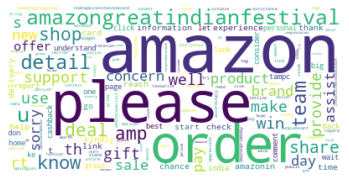

In [31]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False).generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
import os
os.chdir(r"C:\Users\Rohit\Desktop\Rohit 2\project")

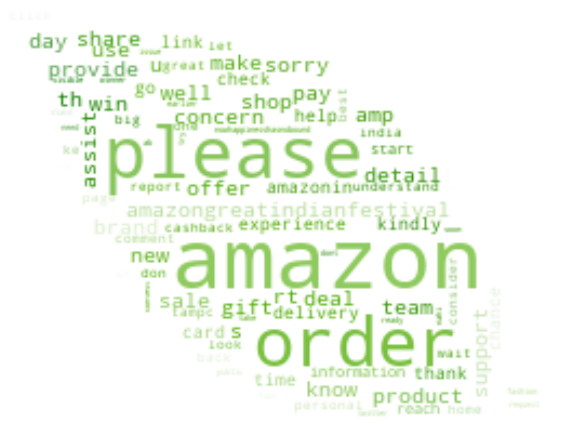

In [33]:

from PIL import Image

mask = np.array(Image.open("leaf_t.jpg"))
wordcloud_full = WordCloud(stopwords=stopwords,background_color='white',
                           mode="RGBA",
                           max_words=30000,
                           mask=mask,
                           collocations=False).generate(text)


image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15]) 
plt.imshow(wordcloud_full.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
data_1['polarity'] = data_1['text'].apply(pol)
data_1.head(10)

,text,polarity
0,extend support lakhs local businesses like hav...,0.000000
1,amazonsmallbusinessdays special irresistible d...,0.160714
2,sellersofamazon greatful customers efforts sho...,0.083333
3,celebrate small businesses amazonsmallbusiness...,0.083333
4,ckchandra sorry know account issue please know...,-0.500000
5,malikbharat sorry trouble youre face app weve ...,-0.094444
6,imgovard get disappointment understand wait ti...,-0.266667
7,seller community thoroughly appreciate constan...,0.096591
8,extend support lakhs local businesses like ece...,0.000000
9,look splurge handcraft marvel nows chance amaz...,0.000000


In [35]:
data_1['Sentiment'] = np.where(data_1['polarity']>=0, 'Positive', 'Negative')
data_1.head()

,text,polarity,Sentiment
0,extend support lakhs local businesses like hav...,0.000000,Positive
1,amazonsmallbusinessdays special irresistible d...,0.160714,Positive
2,sellersofamazon greatful customers efforts sho...,0.083333,Positive
3,celebrate small businesses amazonsmallbusiness...,0.083333,Positive
4,ckchandra sorry know account issue please know...,-0.500000,Negative


In [36]:
data_1.Sentiment.value_counts()

Positive    2811
Negative     389
Name: Sentiment, dtype: int64

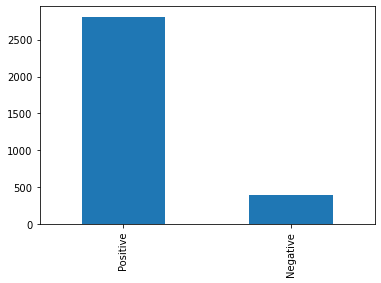

In [37]:
data_1.Sentiment.value_counts().plot.bar()